In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from AutoUnet import *
from train_AutoUnet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

c:\ProgramData\Anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: Could not find module 'C:\ProgramData\Anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


Using device: cpu


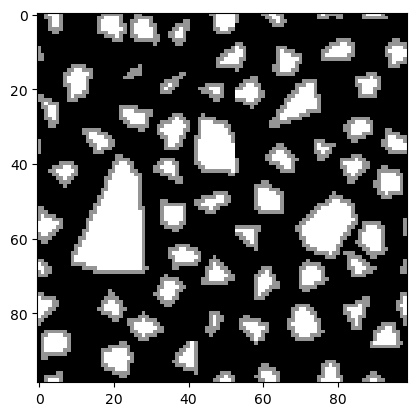

In [13]:
data = dataset()
imgs, label = data.__getitem__(3)
loaders = get_loaders_manual(data, 3)
plt.imshow(imgs[0], cmap='Greys')

In [14]:
args = {'lr' : 0.001, 'epochs' : 200, 'dev' : dev, 'name' : 'AutoUnet'}

In [17]:
unet = AutoUNet()

In [ ]:
unet = load_network(unet, args['name'], args)

In [21]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  6752.9114583333


KeyboardInterrupt: 

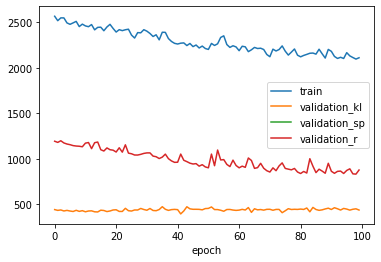

In [28]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation_kl', 'validation_sp', 'validation_r'])

In [24]:
train_data = next(iter(loaders['train']))[0].to(args['dev'])

In [8]:
unet = unet.to(args['dev'])

In [9]:
y = unet(train_data)